### Assignment

In this exercise, you'll predict house prices using your model. To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

    Load the houseprices data from Thinkful's database.
    Split your data into train and test sets.
    Estimate your model from the previous checkpoint in the train set. Assess the goodness of fit of your model.
    Predict the house prices in the test set, and evaluate the performance of your model using the metrics we mentioned in this checkpoint.
    Is the performance of your model satisfactory? Why?
    Try to improve your model in terms of predictive performance by adding or removing some variables.

Please submit a link your work notebook. This is not a graded checkpoint, but you should discuss your solutions with your mentor. Also, when you're done, compare your work to this example solution.




#### Load the houseprices data from Thinkful's database

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
from sqlalchemy import create_engine

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
houseprices_df = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

houseprices_df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.000,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [2]:
kitchenqual_ohc_df = pd.get_dummies(houseprices_df.kitchenqual, prefix = 'kitchenqual',drop_first=True)
houseprices_df = pd.concat([houseprices_df, kitchenqual_ohc_df], axis=1)

fullbath_ohc_df = pd.get_dummies(houseprices_df.fullbath, prefix = 'fullbath', drop_first=True)
houseprices_df = pd.concat([houseprices_df, fullbath_ohc_df], axis=1)

#### Split your data into train and test sets

In [3]:
#M1
Y = houseprices_df['saleprice']

X = houseprices_df[['overallqual', 'grlivarea', 'garagecars',
            'garagearea', 'totalbsmtsf', 'firstflrsf', 
            'fullbath', 'totrmsabvgrd', 'yearbuilt',
            'fullbath_1', 'kitchenqual_TA', 'yearremodadd']]


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print('The number of observations in training set is {}'.format(X_train.shape[0]))
print('The number of observations in test set is {}'.format(X_test.shape[0]))

The number of observations in training set is 1168
The number of observations in test set is 292


In [5]:
# We add constant to the model as it's a best practice
# to do so ever ytime!
X_train = sm.add_constant(X_train)

# We fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# We print the summary results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     340.5
Date:                Wed, 23 Oct 2019   Prob (F-statistic):               0.00
Time:                        14:43:05   Log-Likelihood:                -13942.
No. Observations:                1168   AIC:                         2.791e+04
Df Residuals:                    1155   BIC:                         2.798e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.083e+06   1.55e+05     -6.

#### Estimate your model from the previous checkpoint in the train set. Assess the goodness of fit of your model.

**M1_train set:**

**F-statistic: 340.5,  Prob (F-statistic): 0.00.**
The p-value of the F-statistic is 0.00, which indicates that the features of the model are providing useful information as compared to a reduced model. 

**R-squared: 0.780,  Adj. R-squared: 0.777.**
The Adj R-sq value is 77.7% which indicates that the model explains 77.7% of the variance in house prices. This appears to be a satisfactory value. 

**AIC: 2.791e+04,  BIC: 2.798e+04**
Both values appear relatively high. The AIC is lower than the BIC, which may be an indication of overfitting. The higher BIC may be due to a relatively high number of features. 


#### Predict the house prices in the test set
and evaluate the performance of your model using the metrics we mentioned in this checkpoint.

Mean absolute error of the prediction is: 25651.368104416364
Mean squared error of the prediction is: 1550241563.5339398
Root mean squared error of the prediction is: 39373.107110487734
Mean absolute percentage error of the prediction is: 15.526186480532326


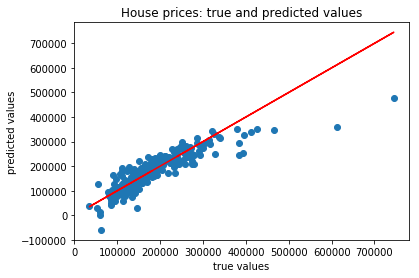

In [6]:
#M1_test
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color='red')
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.title('House prices: true and predicted values')

print('Mean absolute error of the prediction is: {}'.format(mean_absolute_error(y_test, y_preds)))
print('Mean squared error of the prediction is: {}'.format(mse(y_test, y_preds)))
print('Root mean squared error of the prediction is: {}'.format(rmse(y_test, y_preds)))
print('Mean absolute percentage error of the prediction is: {}'.format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

##### evaluate the performance of your model using the metrics

MAE of the prediction is: 25651.368104416364
MSE of the prediction is: 1550241563.5339398
RMSE of the prediction is: 39373.107110487734
MAPE of the prediction is: 15.526186480532326

#### Is the performance of your model satisfactory? Why?

The numbers in the above metrics (MAE, MSE, RMSE) are relatively high, but it is difficult to assess the meaning without something to compare them to. 
The MAPE, which is unitless, is lower than the MAPE in the example given in the checkpoint, which does seem to indicate a better performance than the example model.

Regarding the graph depiction of the model's performance, it appears that the model is fairly good at making predictions in the low-mid ranges of the target, but loses some of its predictibility power above $300,000. 

#### Try to improve your model in terms of predictive performance by adding or removing some variables.

In [7]:
#M4
Y = houseprices_df['saleprice']

X = houseprices_df[['overallqual', 'grlivarea', 'garagecars',
                    'totalbsmtsf', 'yearbuilt', 'fullbath_1',
                    'kitchenqual_TA', 'yearremodadd', 
                    'fullbath_2', 'kitchenqual_Gd', 'kitchenqual_Fa']]


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print('The number of observations in training set is {}'.format(X_train.shape[0]))
print('The number of observations in test set is {}'.format(X_test.shape[0]))

The number of observations in training set is 1168
The number of observations in test set is 292


In [9]:
#M4_train
# We add constant to the model as it's a best practice
# to do so ever ytime!
X_train = sm.add_constant(X_train)

# We fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# We print the summary results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     408.2
Date:                Wed, 23 Oct 2019   Prob (F-statistic):               0.00
Time:                        15:00:16   Log-Likelihood:                -13899.
No. Observations:                1168   AIC:                         2.782e+04
Df Residuals:                    1156   BIC:                         2.788e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -8.936e+05   1.56e+05     -5.

**M4_train set:**

**M1_train: F-statistic: 340.5,  Prob (F-statistic): 0.00,
M4_train: F-statistic: 408.2,  Prob (F-statistic): 0.00.**
The p-value of the F-statistic remains 0.00 from M1 to M4 training models, which indicates that the features of the model are providing useful information as compared to a reduced model. 

**M1_train: R-squared: 0.780,  Adj. R-squared: 0.777,
M4_train: R-squared: 0.795,  Adj. R-squared: 0.793.**
Both the R-sq and Adj R-sq values are higher in the M4 model. The Adj R-sq is 79.3% which indicates improvement in the second training model. 

**M1_train: AIC: 2.791e+04,  BIC: 2.798e+04,
M1_train: AIC: 2.782e+04,  BIC: 2.788e+04**
Both values are decreased from the previous model, which would indicate improvement. 


Mean absolute error of the prediction is: 22952.20819121185
Mean squared error of the prediction is: 1203426572.9448853
Root mean squared error of the prediction is: 34690.43921522017
Mean absolute percentage error of the prediction is: 13.64161077430568


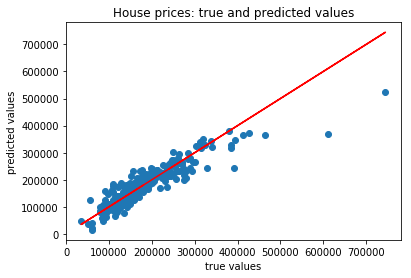

In [10]:
#M4_test
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color='red')
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.title('House prices: true and predicted values')

print('Mean absolute error of the prediction is: {}'.format(mean_absolute_error(y_test, y_preds)))
print('Mean squared error of the prediction is: {}'.format(mse(y_test, y_preds)))
print('Root mean squared error of the prediction is: {}'.format(rmse(y_test, y_preds)))
print('Mean absolute percentage error of the prediction is: {}'.format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

M1_MAE of the prediction is: 25651.368104416364
M1_MSE of the prediction is: 1550241563.5339398
M1_RMSE of the prediction is: 39373.107110487734
M1_MAPE of the prediction is: 15.526186480532326

M4_MAE of the prediction is: 22952.20819121185
M4_MSE of the prediction is: 1203426572.9448853
M4_RMSE of the prediction is: 34690.43921522017
M4_MAPE of the prediction is: 13.64161077430568

All four metrics have decreased from the M1 model. As a lower number is desired, all four metric indicate improvement in the prediction of the second model over the first. 

##### Run your house prices model again (M1)
and assess the goodness of fit of your model using F-test, R-squared, adjusted R-squared, AIC and BIC.

In [ ]:
import statsmodels.api as sm

Y = houseprices_df['saleprice']

X = houseprices_df[['overallqual', 'grlivarea', 'garagecars',
            'garagearea', 'totalbsmtsf', 'firstflrsf', 
            'fullbath', 'totrmsabvgrd', 'yearbuilt',
            'fullbath_1', 'kitchenqual_TA', 'yearremodadd']]

results = sm.OLS(Y, X).fit()

results.summary()

#### Do you think your model is satisfactory? If so, why?

The model appears satisfactory in the sense that that the Adj R-sq value is high and the p-value of the F-statistic is 0. However, there are features which are not significantly stastic and there are indications of possible overfitting. 

#### In order to improve the goodness of fit of your model, try different model specifications by adding or removing some variables.

**Which features are statistically significant, and which are not?**

Significant: 'overallqual', 'grlivarea', 'garagecars',
            'totalbsmtsf', 'firstflrsf', 
            'fullbath', 'yearbuilt',
            'fullbath_1', 'kitchenqual_TA', 'yearremodadd'
            
Not significant: 'garagearea', 'totrmsabvgrd', 

##### Model 2 (M2)

In [ ]:
Y = houseprices_df['saleprice']

X = houseprices_df[['overallqual', 'grlivarea', 'garagecars',
            'totalbsmtsf', 'firstflrsf', 'fullbath', 'yearbuilt',
            'fullbath_1', 'kitchenqual_TA', 'yearremodadd']]

results = sm.OLS(Y, X).fit()

results.summary()

#### For each model you try, get the goodness of fit metrics and compare your models with each other. Which model is the best and why?


**Assess the goodness of fit of each model using F-test, R-squared, adjusted R-squared, AIC and BIC. Which model is the best and why?**

**M1: F-statistic: 3121,  Prob (F-statistic): 0.00.
M2: F-statistic:  3747,   Prob (F-statistic): 0.00.**

The p-value of the F-statistic is 0.00 in each model, which indicates that the features of the model are providing useful information as compared to a reduced model. 

**M1:  R-squared: 0.963,  Adj. R-squared: 0.962.
M2:  R-squared: 0.963,  Adj. R-squared: 0.962**

The R-sq and Adj R-sq value remained the same from M1 to M2. The Adj R-sq value of 96.2% appears to indicatea successful model, however this high may be an indication of overfitting. 

**M1: AIC: 3.497e+04,  BIC: 3.503e+04, 
M2: AIC: 3.497e+04,  BIC: 3.502e+04.**

There was little movement in these values. The BIC decreased slighltly, which may be an indication of an improved model.  

**Features**
All features remain significantly significant. I am mostly curious about the effect of 'fullbath', which decreased slightly this model, and 'fullbath1', which increased slightly. I will remove 'fullbath' and perhaps add the more specific number of full baths. 

I am also curious regarding the effect of 'kitchenqual' on the model. As it is a negative feature on the price of the house, I wonder if including the other levels of quality with improve the model. 

##### Model 3 (M3)

In [ ]:
Y = houseprices_df['saleprice']

X = houseprices_df[['overallqual', 'grlivarea', 'garagecars',
                    'totalbsmtsf', 'firstflrsf', 'fullbath', 
                    'yearbuilt', 'fullbath_1', 'kitchenqual_TA',
                    'yearremodadd', 'fullbath_2', 'fullbath_3',
                    'kitchenqual_Gd', 'kitchenqual_Fa']]

results = sm.OLS(Y, X).fit()

results.summary()

**Assess the goodness of fit of each model using F-test, R-squared, adjusted R-squared, AIC and BIC. Which model is the best and why?**

**M1: F-statistic: 3121,  Prob (F-statistic): 0.00,
M2: F-statistic:  3747,   Prob (F-statistic): 0.00,
M3: F-statistic:  3269,   Prob (F-statistic): 0.00.**

The p-value of the F-statistic is 0.00 in each model, which indicates that the features of the model are providing useful information as compared to a reduced model. 

**M1:  R-squared: 0.963,  Adj. R-squared: 0.962,
M2:  R-squared: 0.963,  Adj. R-squared: 0.962,
M3:  R-squared: 0.0.967,  Adj. R-squared: 0.0.967**

The R-sq and Adj R-sq values show an improvement from the values of M1 to M2. The Adj R-sq value of 96.7% appears to indicate a successful model, however this high may be an indication of overfitting. 

**M1: AIC: 3.497e+04,  BIC: 3.503e+04, 
M2: AIC: 3.497e+04,  BIC: 3.502e+04,
M3: AIC: 3.479e+04,  BIC: 3.486e+04.**

Both the AIC and BIC have decreased, which may be an indication of an improved model.  

**Features**
All added kitchen and bathroom features are stastically significant. All other features are significantly EXCEPT 'fullbath', which will be removed. 

Although 'firstflsf' remains significant, it is less so in this model. Due to its reduction in significance and the fact that it is likely overlapping with 'totalbsmtsf', I will remove it as well. 

##### Model 4 (M4)

In [ ]:
#will remove 'fullbath' and 'firstflsf'
Y = houseprices_df['saleprice']

X = houseprices_df[['overallqual', 'grlivarea', 'garagecars',
                    'totalbsmtsf', 'yearbuilt', 'fullbath_1',
                    'kitchenqual_TA', 'yearremodadd', 
                    'fullbath_2', 'fullbath_3',
                    'kitchenqual_Gd', 'kitchenqual_Fa']]

results = sm.OLS(Y, X).fit()

results.summary()

In [ ]:
#will remove 'fullbath_3' as it is not significant

In [ ]:
#will remove 'fullbath_3'
Y = houseprices_df['saleprice']

X = houseprices_df[['overallqual', 'grlivarea', 'garagecars',
                    'totalbsmtsf', 'yearbuilt', 'fullbath_1',
                    'kitchenqual_TA', 'yearremodadd', 
                    'fullbath_2', 'kitchenqual_Gd', 'kitchenqual_Fa']]

results = sm.OLS(Y, X).fit()

results.summary()

**Aassess the goodness of fit of each model using F-test, R-squared, adjusted R-squared, AIC and BIC. Which model is the best and why?**

**M1: F-statistic: 3121,  Prob (F-statistic): 0.00,
M2: F-statistic:  3747,   Prob (F-statistic): 0.00,
M3: F-statistic:  3269,   Prob (F-statistic): 0.00,
M4: F-statistic:  3851.,   Prob (F-statistic): 0.00**

The p-value of the F-statistic is 0.00 in each model, which indicates that the features of the model are providing useful information as compared to a reduced model. 

**M1:  R-squared: 0.963,  Adj. R-squared: 0.962,
M2:  R-squared: 0.963,  Adj. R-squared: 0.962,
M3:  R-squared: 0.0.967,  Adj. R-squared: 0.0.967,
M4:  R-squared: 0.0.967,  Adj. R-squared: 0.0.967.**

The R-sq and Adj R-sq values show an improvement from the values of M1 to M2 and remain the same from M3 to M4. The Adj R-sq value of 96.7% appears to indicate a successful model, however this high may be an indication of overfitting. 

**M1: AIC: 3.497e+04,  BIC: 3.503e+04, 
M2: AIC: 3.497e+04,  BIC: 3.502e+04,
M3: AIC: 3.479e+04,  BIC: 3.486e+04,
M4: AIC: 3.479e+04,  BIC: 3.485e+04.**

The BIC has decreased, which may be an indication of an improved model.  

**Features**
All features remain stastically significant.

Features which have increased in impact: 
'garagecars', 'totalbsmtsf', 'yearbuilt', 'fullbath_1' (although now a negative impact).

The impact on the full bath features are interesting in that in the original model, the 'fullbath' feature ADDED 1.389e+04 and the 'fullbath_1' feature also added 
1.986e+04. With the inclusion of all the full bath features, the result is now 'fullbath_1' has a larger, but negative impact of -4.072e+04. An additional full bath 'fullbath_2' appears to reduce the value even further, -4.499e+04. I do not understand this. 

The addition of all the kitchen quality features has increased the impact of each of the features, but shows that the impact is dependent on the quality of the kitchen. A good quality kitchen reduces the value less than the typical and fair quality kitchens. 

M1 'kitchenqual_TA' = -1.736e+04,
M4 'kitchenqual_TA' = -6.457e+04, and 
M4 'kitchenqual_Fa' = -6.299e+04
M4 'kitchenqual_Gd' = -4.831e+04.
